# Predicting wine quality with Decision Trees
### Decision trees have very good interpretability. Decision trees are built quickly. No adjustments (of `StandardScaler` type) to the data are needed. They can also be used for classification, and not only for regression.



* We will return to [datasets of wines from northern Portugal](https://archive.ics.uci.edu/ml/datasets/wine).

* Let's read them with pandas.

* We want to be able to predict the quality of a wine from the rest of the data we are given about it.

In [1]:
import pandas as pd

wine_df = pd.read_csv("wines.csv")
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,quality
0,5.5,0.32,0.13,1.30,0.037,45.0,156.0,0.99184,3.26,0.38,10.7,0,5
1,7.8,0.76,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,5
2,6.3,0.23,0.22,3.75,0.039,37.0,116.0,0.99270,3.23,0.50,10.7,0,6
3,5.9,0.32,0.20,14.40,0.050,29.0,144.0,0.99666,3.24,0.41,10.3,0,6
4,5.7,0.16,0.32,1.20,0.036,7.0,89.0,0.99111,3.26,0.48,11.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.9,0.26,0.41,15.15,0.040,38.0,216.0,0.99760,2.96,0.60,10.0,0,6
6493,6.5,0.18,0.33,1.40,0.029,35.0,138.0,0.99114,3.36,0.60,11.5,0,7
6494,6.3,0.76,0.00,2.90,0.072,26.0,52.0,0.99379,3.51,0.60,11.5,1,6
6495,10.2,0.41,0.43,2.20,0.110,11.0,37.0,0.99728,3.16,0.67,10.8,1,5


* We will split our data into training and control data, as known.

* We will get all the columns except the `quality` column, which we want to predict.

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine_df.loc[:, 'fixed acidity':'color'],
                                                    wine_df['quality'],
                                                    test_size=0.25,
                                                    random_state=42)

* Our subject this time is *regression*.

* We want to predict the *value* of a numeric quantity.

* We will use a decision tree, as implemented by the `DecisionTreeRegressor` class.

In [3]:
from sklearn.tree import DecisionTreeRegressor

wine_tree = DecisionTreeRegressor(max_depth=3)

wine_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

* Let's see how we did.

* Caution: now we cannot use correctness, precision, recall, etc. since we are predicting a numeric value.

* So we will use the Mean Absolute Error (MAE):

$$ \mathrm {MAE} ={\frac {\sum _{i=1}^{n}\left|y_{i}-\hat{y}_{i}\right|}{n}}$$

* We could also use the Mean Squared Error (MSE), but the error units will not be the wine quality units (it will be their square).

In [4]:
from sklearn import metrics

predicted = wine_tree.predict(X_test)
print(metrics.mean_absolute_error(y_test, predicted))

0.5894927147838183


* To understand what happened, we can draw the decision tree.

* The color of each node corresponds to the position of the node in the value field.

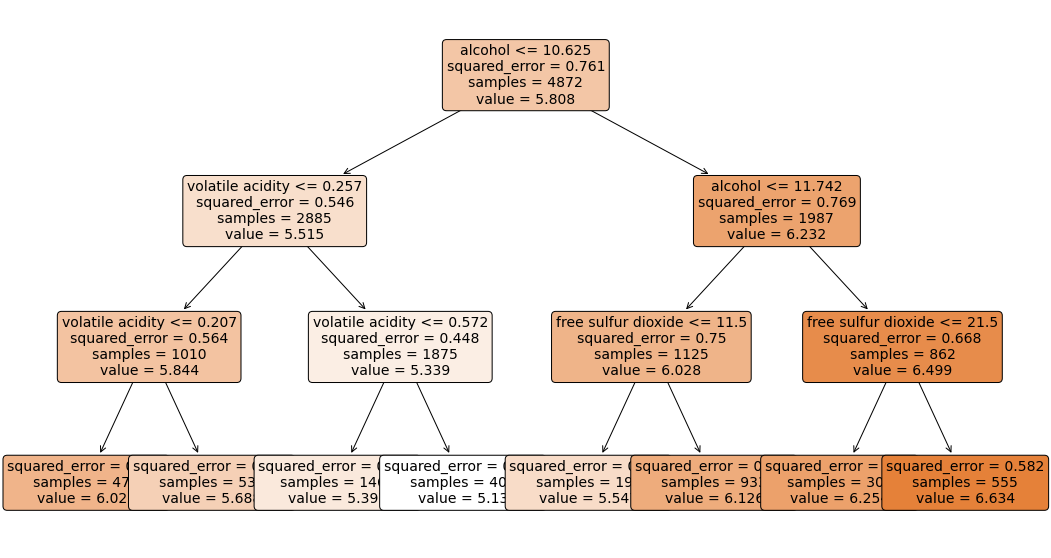

In [5]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(18, 10))
_ = tree.plot_tree(wine_tree, 
                   feature_names=wine_df.columns[:-1],
                   filled=True, rounded=True, fontsize=14)

* For a better aesthetic result, we can use [GraphViz](https://graphviz.org/) and the `pydotplus` Python interface.

* `pydotplus` is a Python library and is installed like Python libraries.

* GraphViz can be installed separately by following the instructions on the [related page](https://graphviz.org/download/).

In [6]:
from io import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(wine_tree, out_file=dot_data,  
                     feature_names=wine_df.columns[:-1],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

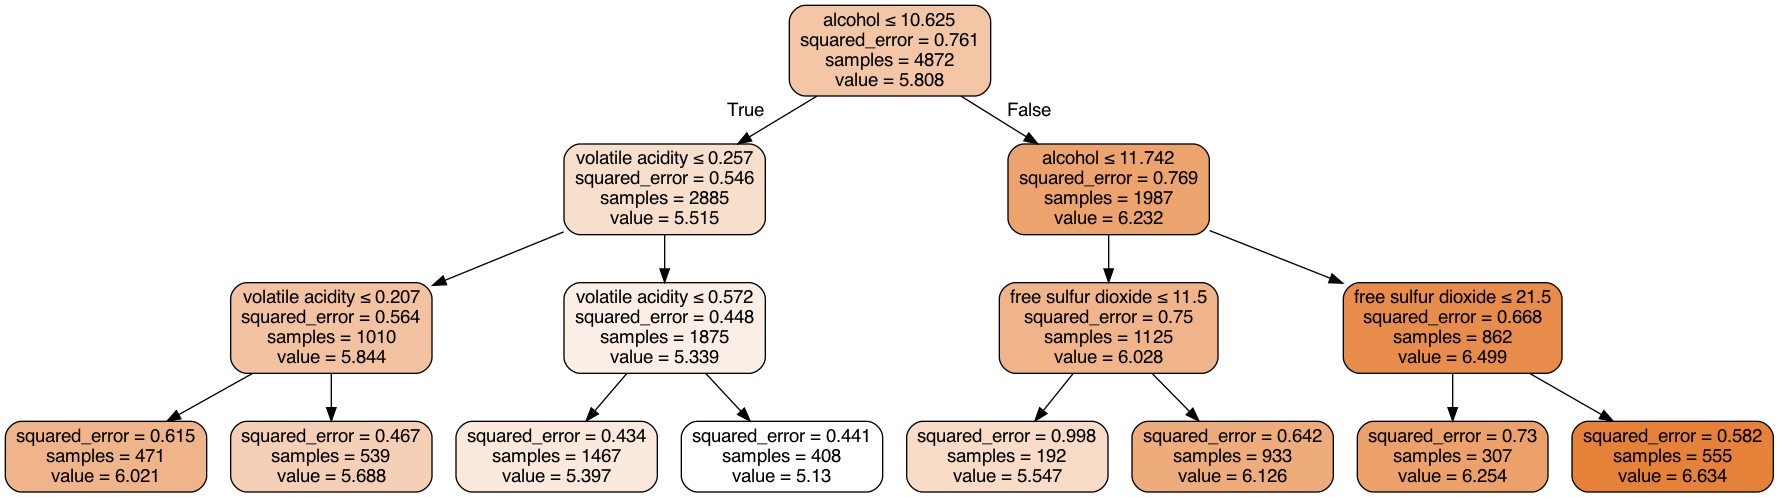

In [7]:
Image(graph.create_png())  

* We can also get a representation of the tree in the form of text rules.

In [8]:
feature_names = list(wine_df.loc[:, 'fixed acidity':'color'].columns)
print(tree.export_text(wine_tree, feature_names=feature_names))

|--- alcohol <= 10.62
|   |--- volatile acidity <= 0.26
|   |   |--- volatile acidity <= 0.21
|   |   |   |--- value: [6.02]
|   |   |--- volatile acidity >  0.21
|   |   |   |--- value: [5.69]
|   |--- volatile acidity >  0.26
|   |   |--- volatile acidity <= 0.57
|   |   |   |--- value: [5.40]
|   |   |--- volatile acidity >  0.57
|   |   |   |--- value: [5.13]
|--- alcohol >  10.62
|   |--- alcohol <= 11.74
|   |   |--- free sulfur dioxide <= 11.50
|   |   |   |--- value: [5.55]
|   |   |--- free sulfur dioxide >  11.50
|   |   |   |--- value: [6.13]
|   |--- alcohol >  11.74
|   |   |--- free sulfur dioxide <= 21.50
|   |   |   |--- value: [6.25]
|   |   |--- free sulfur dioxide >  21.50
|   |   |   |--- value: [6.63]

